In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import seed
from Zindi import * #This is a custom module for helpful functions
seed(7)

In [2]:
X = np.load('train_feat.npy')
y = np.load('train_labels.npy')

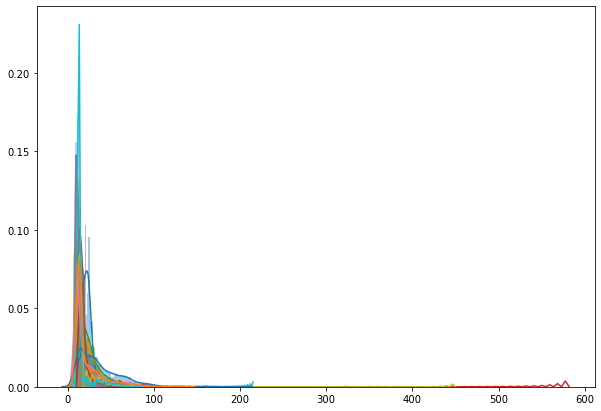

In [3]:
plt.figure(figsize=(10,7))
for m in range(12):
    sns.distplot(X[:,m,20,20,10], bins=50)

The above plot shows data has a long tail. Lets try a log transform to check if the datalooks more Gaussian.

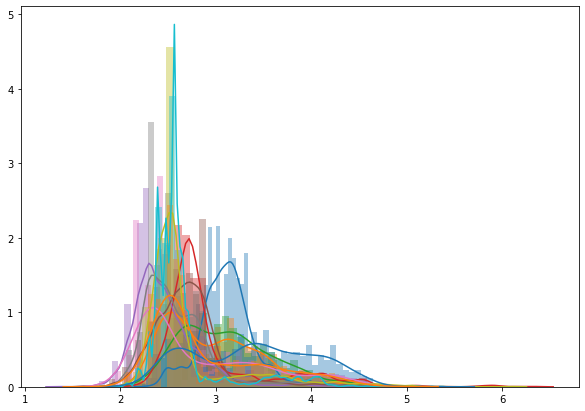

In [4]:
plt.figure(figsize=(10,7))
for m in range(12):
    sns.distplot(np.log(X[:,m,20,20,10]), bins=50)

This looks much better. However, this is just a trial method and its not clear if the log transform is the required or the right transformation. Let us move ahead and check if the transformation has any impact on the existing models.

In [5]:
X_log = np.log(X[..., :12])

In [6]:
#show_stats() is a function from the custom Zindi untility module to show summary statistics for the entire array.
show_stats(X_log)

Min =  0.0
Max =  9.401208634738603
Mean =  6.947871002894143
Std =  1.3508376817939078


In [7]:
#std_scale_input() is from the Zindi custom module similar to sklearn standard scaler.
X_log, X_mean, X_std = std_scale_input(X_log)

Min =  -5.143379620316331
Max =  1.8161601981567739
Mean =  4.757635711146284e-14
Std =  0.9999999999999956
Features of input array have been scaled!


In [8]:
#Replace all sentinel bands with log transformed values 
X[..., :12] = X_log

In [9]:
X_ind = np.load('train_ind.npy')

In [10]:
#Load indices to bands 0, 1, 9 & 10
X[..., 0] = X_ind[..., 0]
X[..., 1] = X_ind[..., 1]
X[..., 9] = X_ind[..., 2]
X[..., 10] = X_ind[..., 3]

In [11]:
np.save('train_ind_log_scaled.npy', X)

In [12]:
#Only 6 months data kept (from Feb to July). All bands preserved.
X_6mos = np.delete(X, [0,7,8,9,10,11], 1)
np.save('train_ind_log_scaled_6m.npy', X_6mos)

##Test Data Preparation
Repeat the above steps for test data. This time, normalizing is done using the mean and std from train set.

In [13]:
X_test = np.load('test_feat.npy')

In [14]:
X_test_log = np.log(X_test[..., :12])

In [15]:
X_test_log = (X_test_log - X_mean) / X_std

In [16]:
X_test_ind = np.load('test_ind.npy')

In [17]:
X_test[..., :12] = X_test_log

In [18]:
#Load indices to bands 0, 1, 9 & 10
X_test[..., 0] = X_test_ind[..., 0]
X_test[..., 1] = X_test_ind[..., 1]
X_test[..., 9] = X_test_ind[..., 2]
X_test[..., 10] = X_test_ind[..., 3]

In [19]:
np.save('test_ind_log_scaled.npy', X)

In [20]:
#Only 6 months data kept (from Feb to July). All bands preserved.
X_test_6mos = np.delete(X_test, [0,7,8,9,10,11], 1)
np.save('test_ind_log_scaled_6m.npy', X_test_6mos)